In [13]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand

# Термодинамика 
### все единицы в си

In [2]:
# параметры среды
k = 1.38e-23
R = 8.31
dt = 0.001

# параметры газа 1
T = 1000
m0 = 6.645e-27
M = 28 * 10^-3
N = 100

# параметры газа 2
T2 = 5000
m02 = 3 * m0
M2 = 3 * M
N2 = 55

# параметры сосуда
wdt = 100
hgt = 100

In [3]:
# генерируем начальные скорости и координаты
# модуль скорости частиц
vel = (3 * k * T / (m0 * N))**0.5
# массив (скорость частицы, и угол под которым она летит)
# по сути тут используется полярная система координат
velocs = [[vel, rand.uniform(-np.pi, np.pi)] for i in range(N)]
# x y - координаты
coords = [[rand.uniform(0, wdt/ 2), rand.uniform(0, hgt)] for i in range(N)]

In [4]:
# генерируем начальные скорости и координаты
# модуль скорости частиц
vel2 = (3 * k * T2 / (m02 * N2))**0.5
# массив (скорость частицы, и угол под которым она летит)
velocs2 = [[vel2, rand.uniform(-np.pi, np.pi)] for i in range(N2)]
# x y - координаты
coords2 = [[rand.uniform(wdt/2, wdt), rand.uniform(0, hgt)] for i in range(N2)]

In [5]:
# проверка частицы на столкновение со стенками
def coolisons(coord, veloc):
    global wdt, hgt
    """
    coord - x, y
    veloc - V, phi
    """
    x = coord[0]
    y = coord[1]
    phi = veloc[1]
    
    if(x >= wdt):
        phi= np.pi - phi
        x = wdt
    if(x <= 0):
        phi = np.pi - phi
        x = 0
        
    if(y >= hgt):
        phi = -phi
        y = hgt
    if( y <= 0):
        phi = -phi
        y = 0
    
    coord[0] = x
    coord[1] = y
    veloc[1] = phi
    
# изменение координаты у частицы
def moveParticle(coord, veloc):
    """
    coord - x, y
    veloc - V, phi
    """
    x = coord[0]
    y = coord[1]
    v = veloc[0]
    phi = veloc[1]
    
    x = x + v * np.cos(phi) * dt
    y = y + v * np.sin(phi) * dt
    
    coord[0] = x
    coord[1] = y
    
# обновление всех частиц
def update():
    global coords, velocs, N
    global coord2, velocs2, N2
    
    for i in range(N):
        moveParticle(coords[i], velocs[i])
        coolisons(coords[i], velocs[i])
        
    for i in range(N2):    
        moveParticle(coords2[i], velocs2[i])
        coolisons(coords2[i], velocs2[i])

    
    

In [22]:
# функция animate для анимации симуляции
# функция axisUpdate для перерисовки границ
def axisUpdate():
    global ax, wdt, hgt
    ax.clear()
    ax.set_xlim(0, wdt)
    ax.set_ylim(0, hgt)
    
def animate(i):
    global ax, coords, coords2
    axisUpdate()
    update()
    
    for j in range(N):
        ax.scatter([coords[j][0]], [coords[j][1]], color = 'b')
    for j in range(N2):        
        ax.scatter([coords2[j][0]], [coords2[j][1]], color = 'r')

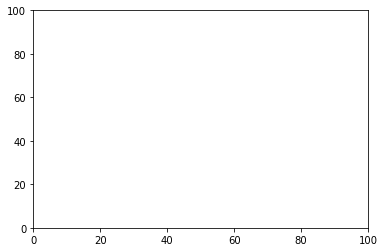

In [7]:
# отрисовка симуляции
fig = plt.figure()
ax = plt.axes(xlim=(0, wdt), ylim=(0, hgt))

In [24]:
import matplotlib.animation as animation
anim = animation.FuncAnimation(fig, animate, frames = 500, interval=5)
from IPython.display import HTML
HTML(anim.to_jshtml())  